### Training Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfx = pd.read_csv("datasets/imdb_trainX.txt",sep = "\n",header = None)
dfy = pd.read_csv("datasets/imdb_trainY.txt",sep = "\n",header = None)

In [3]:
x = dfx.values
y = dfy.values
print(x.shape,y.shape)

(25000, 1) (25000, 1)


In [4]:
x = x.reshape(-1)
y = y.reshape(-1)
print(x.shape,y.shape)

(25000,) (25000,)


In [5]:
import clearData as cd

In [6]:
xClean = [cd.getCleanReview(i) for i in x]

In [7]:
yClean = y

#for i in y:
 #   if(i > 5):
   #     yClean.append(1)
  #  else:
    #    yClean.append(0)

In [8]:
import random

In [9]:
combined = list(zip(xClean,yClean))
random.shuffle(combined)

xClean[:],yClean[:] = zip(*combined)

In [10]:
xClean = xClean[:1000]
yClean = yClean[:1000]

### Test Data

In [30]:
tfx = pd.read_csv("datasets/imdb_testX.txt",sep = "\n",header = None)
tfy = pd.read_csv("datasets/imdb_testY.txt",sep = "\n",header = None)

In [12]:
tx = tfx.values
ty = tfy.values
print(tx.shape,ty.shape)

(25000, 1) (25000, 1)


In [13]:
tx = tx.reshape(-1)
ty = ty.reshape(-1)
print(tx.shape,ty.shape)

(25000,) (25000,)


In [14]:
xTestClean = [cd.getCleanReview(i) for i in tx]

In [15]:
yTestClean = ty

#for i in ty:
 #   if(i > 5):
  #      yTestClean.append(1)
   # else:
    #    yTestClean.append(0)

In [16]:
combined = list(zip(xTestClean,yTestClean))
random.shuffle(combined)

xTestClean[:],yTestClean[:] = zip(*combined)

In [17]:
xTestClean = xTestClean[:1000]
yTestClean = yTestClean[:1000]

## Predicting

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(ngram_range=(1,2))
xVec = cv.fit_transform(xClean).toarray()
#print(cv.get_feature_names())
print(xVec,xVec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (1000, 109469)


In [20]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

In [21]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [22]:
gnb.fit(xVec,yClean)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
#xtVec = cv.transform(test_clean).toarray()
xtVec = cv.transform(xTestClean).toarray()
print(xtVec,xtVec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (1000, 109469)


In [24]:
yPredicted = gnb.predict(xtVec)
print(yTestClean[:200])
print(yPredicted[:200])
#print(mnb.predict_proba(xtVec))

[ 1 10 10  2  7  9 10  8 10  1  7  1 10  2  9 10  3  7  3  8 10 10  8  3
 10  8  7  8  1  1  8  2  7 10  2 10  7  4  4  8  7  8  3 10  1  4  9  8
  2  7  3  9  1  1  3  4  3 10  2  8  8  1  4  1  4  1  1  4 10 10  3  8
 10  2 10  7  8  2 10  4 10  8  2  3 10 10  7  4  9  9  9  3  9  8  3  1
  8  9  9  7  7  9  7  9  8  1  4  2 10  7  1  8  2 10  3  2  2  3  4  1
  7  1  1  4 10  1 10  4 10  2 10  3  9  3  3 10  1 10  2  9 10  7  1 10
  8  9  8  1  4  2  1  7  8  2  2  1  7  7  9  3  7  8 10  4  3  7  4  1
  3  4  7  4  2  3  4  2  1  1  4  7  1  1 10  1  9 10  8  4  2 10  9  9
  3 10  9 10  1  9 10  1]
[ 1  8 10  1  4  1  4 10  8  1  8  1 10  1  8 10  1  4  8  7 10 10  1  8
  8  1  1  8  1  1  8 10  1  8  4  3  8  1  1  8  9  4  1 10  1  8  1  8
  1  8  9 10  1  1  8  1  1 10  4 10  1  1  8  1  2  8  7  8  7 10  1  1
 10  1  9  8  1 10  2  1  1  7  2  9  8 10 10  1 10  1  1  1 10 10 10  1
  7 10  3  8  8  1  7 10  7  1  1  3  9 10  1 10  1 10  1  1  1  1  1  1
  8  1  1  8  7  8  7  8 

In [25]:
gnb.score(xVec,yClean)

1.0

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [27]:
cnf = confusion_matrix(yPredicted,yTestClean)
print(cnf)

[[135  58  58  48  25  28  39  50]
 [  0   3   4   7   1   0   1   3]
 [  8   4   2  12   5   5   4   6]
 [ 10  12   8   1   9   7   3   9]
 [  1   2   1   2   8   8   3   9]
 [ 17   7  12  19  18  30  24  47]
 [  3   1   4   2   4   5   9  10]
 [ 15   9  10   9  11  38  25  72]]


In [28]:
"""Use this method directly - """
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[135  58  58  48  25  28  39  50]
 [  0   3   4   7   1   0   1   3]
 [  8   4   2  12   5   5   4   6]
 [ 10  12   8   1   9   7   3   9]
 [  1   2   1   2   8   8   3   9]
 [ 17   7  12  19  18  30  24  47]
 [  3   1   4   2   4   5   9  10]
 [ 15   9  10   9  11  38  25  72]]


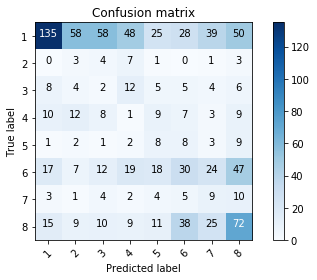

In [29]:
plot_confusion_matrix(cnf, [1,2,3,4,5,6,7,8],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)